<a href="https://colab.research.google.com/github/irawan555/MachineLearningTasks/blob/main/11thWeekTasks/Irawan_Mardiansyah_1103210174_TK4504_CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Irawan Mardiansyah

NIM : 1103210174

Kelas : TK4504

Lecture : 11

Model: CNN

Dokumentasi GPT : https://chatgpt.com/share/f4973fb1-e50c-4a0b-9e01-da26b670d251

# **Langkah 1: Mempersiapkan Library**

Impor Library yang Diperlukan:
Pastikan memiliki library yang diperlukan untuk proyek ini. Jalankan kode berikut untuk mengimpor library:

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# **Langkah 2: Muat dan Pratinjau Dataset**

Muat Dataset CIFAR-10:
Muat dataset CIFAR-10 yang telah dibagi menjadi training dan testing.

In [7]:
# Muat dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai piksel ke rentang 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

Pratinjau Gambar:
Lihat beberapa gambar dari dataset untuk memahami seperti apa data tersebut.

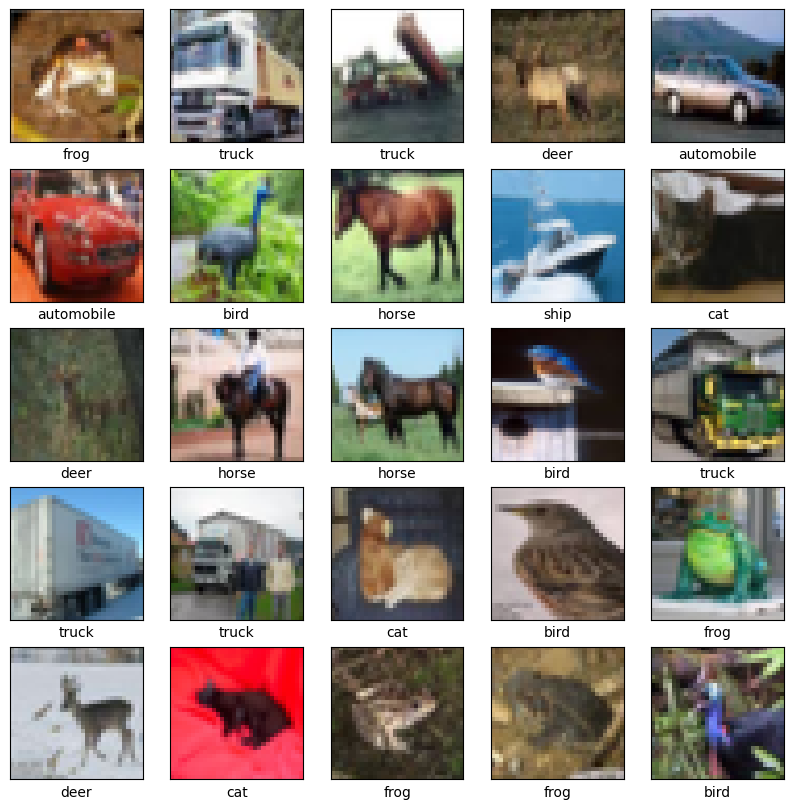

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot beberapa gambar dari dataset training
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# **Langkah 3: Membangun Model CNN**

Bangun Arsitektur Model:
Buat model CNN dengan beberapa lapisan convolusi dan pooling.

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Lihat Arsitektur Model:
Periksa arsitektur model dengan melihat summary-nya.

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

# **Langkah 4: Kompilasi dan Latih Model**

Kompilasi Model:
Kompilasi model dengan menentukan optimizer, loss function, dan metrik evaluasi.

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Latih Model:
Latih model dengan data training dan validasi menggunakan data testing.

In [12]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.5409 - accuracy: 0.4346 - val_loss: 1.3043 - val_accuracy: 0.5417
Epoch 2/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.1617 - accuracy: 0.5867 - val_loss: 1.2057 - val_accuracy: 0.5797
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.0193 - accuracy: 0.6403 - val_loss: 1.0099 - val_accuracy: 0.6463
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9155 - accuracy: 0.6791 - val_loss: 0.9600 - val_accuracy: 0.6667
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8347 - accuracy: 0.7082 - val_loss: 0.9312 - val_accuracy: 0.6808
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7794 - accuracy: 0.7262 - val_loss: 0.9000 - val_accuracy: 0.6920
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7334 - accuracy: 0.7409 - val_loss: 0.8878 -

# **Langkah 5: Evaluasi Model**

Plot Akurasi dan Loss:
Plot grafik akurasi dan loss untuk training dan validasi.

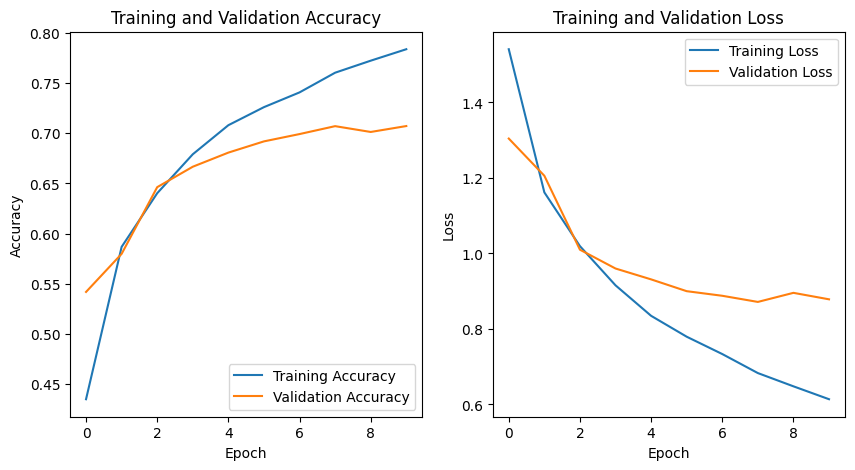

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Evaluasi Model pada Data Testing:
Evaluasi model menggunakan data testing untuk mendapatkan akurasi akhir.

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 4s - loss: 0.8784 - accuracy: 0.7073 - 4s/epoch - 13ms/step

Test accuracy: 0.7073000073432922


# **Langkah 6: Prediksi dengan Model**

Buat Prediksi:
Gunakan model untuk membuat prediksi pada gambar baru.

In [20]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 5s 17ms/step


Tampilkan Prediksi:
Tampilkan prediksi untuk beberapa gambar.

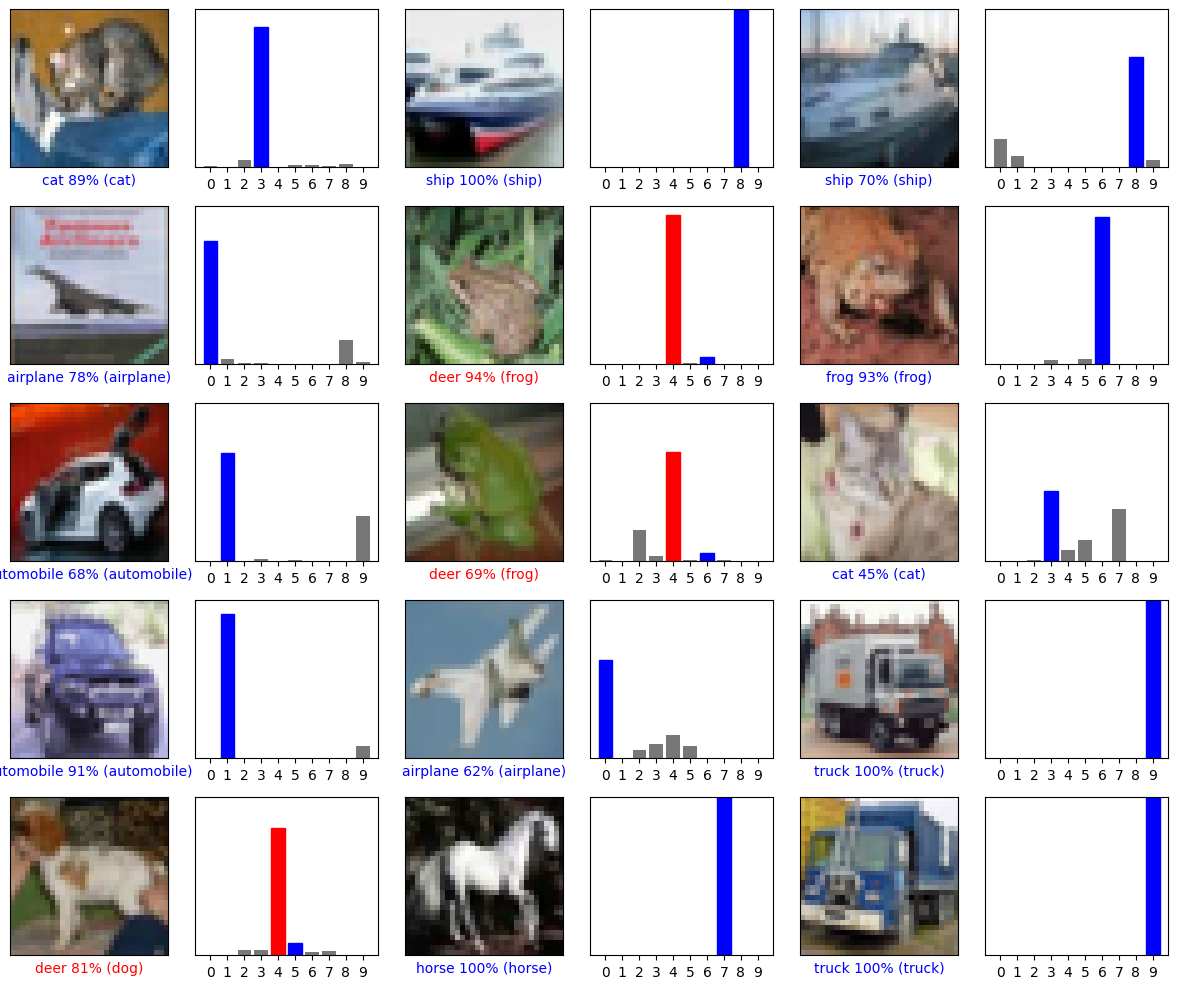

In [21]:
# Fungsi untuk plot gambar dengan prediksi
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label[0]]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

# Plot beberapa gambar dengan prediksi
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
